In [1]:
import cffi
import os
import numpy as np
import pandas as pd
from io import StringIO
from enum import Enum
from Bio import SeqIO
from pathlib import Path
from auxiliary import DATA_SEQ_DIR
from pytrsomix import TRScalculator, TRSanalyzer, AlignmentAnalyzer
import matplotlib.pyplot as plt
from multiprocessing import Pool

# 100 - 25000, 8 genomów, w podejsciu cyrkularne, usiniecie znaku wiekszosci

# Reading in the genomes and calculating the interiors according the trs.txt file

In [2]:
trs_file = (DATA_SEQ_DIR/"klebsiella"/"trs.txt").absolute().as_posix().encode()
tmin=100
tmax=25000
trs1 = TRScalculator(sequence=(DATA_SEQ_DIR/"klebsiella"/"Kp1.fasta").absolute().as_posix().encode(), trs=trs_file, tmin=tmin, tmax=tmax, mode=1)
trs1.calculate()

trs2 = TRScalculator(sequence=(DATA_SEQ_DIR/"klebsiella"/"Kp2.fasta").absolute().as_posix().encode(), trs=trs_file, tmin=tmin, tmax=tmax, mode=1)
trs2.calculate()

trs3 = TRScalculator(sequence=(DATA_SEQ_DIR/"klebsiella"/"Kp3.fasta").absolute().as_posix().encode(), trs=trs_file, tmin=tmin, tmax=tmax, mode=1)
trs3.calculate()

trs4 = TRScalculator(sequence=(DATA_SEQ_DIR/"klebsiella"/"Kp4.fasta").absolute().as_posix().encode(), trs=trs_file, tmin=tmin, tmax=tmax, mode=1)
trs4.calculate()

trs5 = TRScalculator(sequence=(DATA_SEQ_DIR/"klebsiella"/"Kp5.fasta").absolute().as_posix().encode(), trs=trs_file, tmin=tmin, tmax=tmax, mode=1)
trs5.calculate()

trs6 = TRScalculator(sequence=(DATA_SEQ_DIR/"klebsiella"/"Kp6.fasta").absolute().as_posix().encode(), trs=trs_file, tmin=tmin, tmax=tmax, mode=1)
trs6.calculate()

trs7 = TRScalculator(sequence=(DATA_SEQ_DIR/"klebsiella"/"Kp7.fasta").absolute().as_posix().encode(), trs=trs_file, tmin=tmin, tmax=tmax, mode=1)
trs7.calculate()

trs_random = TRScalculator(sequence=(DATA_SEQ_DIR/"klebsiella"/"Kp_Random.fasta").absolute().as_posix().encode(), trs=trs_file, tmin=tmin, tmax=tmax, mode=1)
trs_random.calculate()


name of genome file: /home/rafalb/molecules/TRS-omix/TRS-omix/data/klebsiella/Kp1.fasta
name of input file: /home/rafalb/molecules/TRS-omix/TRS-omix/data/klebsiella/trs.txt
name of output file: interiors.txt
tmin: 100
tmax: 25000
mode: 1

START

size of genome: 5333942
size of input: 9
END
name of genome file: /home/rafalb/molecules/TRS-omix/TRS-omix/data/klebsiella/Kp2.fasta
name of input file: /home/rafalb/molecules/TRS-omix/TRS-omix/data/klebsiella/trs.txt
name of output file: interiors.txt
tmin: 100
tmax: 25000
mode: 1

START

size of genome: 5343479
size of input: 9
END
name of genome file: /home/rafalb/molecules/TRS-omix/TRS-omix/data/klebsiella/Kp3.fasta
name of input file: /home/rafalb/molecules/TRS-omix/TRS-omix/data/klebsiella/trs.txt
name of output file: interiors.txt
tmin: 100
tmax: 25000
mode: 1

START

size of genome: 5521194
size of input: 9
END
name of genome file: /home/rafalb/molecules/TRS-omix/TRS-omix/data/klebsiella/Kp4.fasta
name of input file: /home/rafalb/molec

# Instantiating the SequenceAnalyzer object

In [3]:
sa = TRSanalyzer.SeqAnalyzer([trs1.Result, trs2.Result, trs3.Result, trs4.Result, trs5.Result, trs6.Result, trs7.Result, trs_random.Result])
# remove the ">" character
sa.Combined[">SEQ"] = sa.Combined[">SEQ"].apply(lambda x: x[1:])
sa.Combined

,L-NoClass,L-No,LFS,Len(LFS),L-POS(LFS),R-POS(LFS),R-NoClass,R-No,RFS,Len(RFS),L-POS(RFS),R-POS(RFS),>SEQ,Len(SEQ),GENOME
0,2,4,CGGCGGCGG,9,2404,2412,2,4,CGGCGGCGG,9,3439,3447,CATTGGCCAGTCTCGTTTGACGATGCTGTTGCTGCAGCTTGACCAT...,1026,NC_016845.1
1,2,4,CGGCGGCGG,9,3439,3447,9,26,GCAGCAGCA,9,4374,4382,TATCATTTTCCGCCAGCACCGGATCGAGCTGACCGCTGAGCGTCAT...,926,NC_016845.1
2,9,26,GCAGCAGCA,9,4374,4382,10,29,CTGCTGCTG,9,4819,4827,GCGTCAGGGTGGTCCCCTGGATCTCCGCCGGCAGTTCATAGTGCGG...,436,NC_016845.1
3,10,29,CTGCTGCTG,9,4819,4827,10,28,GCTGCTGCT,9,6481,6489,CCATTGGGTAAATTCCTCGTCGCTCACCTGCAGCGCGCTGGGCACT...,1653,NC_016845.1
4,10,28,GCTGCTGCT,9,6481,6489,2,5,GGCGGCGGC,9,6778,6786,GAAGCACCCGGAAGCGATTAAAAACCCGTTCTTCCTGCTGGCGCCT...,288,NC_016845.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31534,2,4,CGGCGGCGG,9,5298875,5298883,7,21,GACGACGAC,9,5303132,5303140,CAGTCCGCCGGACATGGCTCGTAGCGCGCTGCTTAGGGGCACCTGA...,4248,Kp_Random_https://molbiotools.com/randomsequen...
31535,7,21,GACGACGAC,9,5303132,5303140,10,30,TGCTGCTGC,9,5307004,5307012,CGCAATTTGTAACGGTGCGTTTCCCGTGATGCCAGCTGTCCAGTCG...,3863,Kp_Random_https://molbiotools.com/randomsequen...
31536,10,30,TGCTGCTGC,9,5307004,5307012,11,31,AACAACAAC,9,5325022,5325030,TAGGTGCGAGGTACACTCCACATCTCCGGCTCGCAGGATGACCCGC...,18009,Kp_Random_https://molbiotools.com/randomsequen...
31537,11,31,AACAACAAC,9,5325022,5325030,3,7,ACCACCACC,9,5327268,5327276,CAGCCTGCGAGGGCGCCATGGAGAAGCTATATCAGAGAGTGTGTAT...,2237,Kp_Random_https://molbiotools.com/randomsequen...


In [4]:
sa.Combined.to_csv("all_klebsiella.csv", sep="\t", index= False)

In [2]:
tmp = pd.read_csv("all_klebsiella.csv", sep="\t")
sa = TRSanalyzer.SeqAnalyzer([])
sa.Combined = tmp
del tmp

<AxesSubplot: >

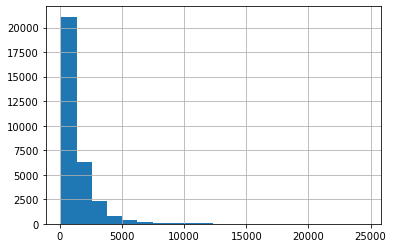

In [3]:
sa.Combined[">SEQ"].apply(lambda x: len(x)).hist(bins=20)

## Unique gnomes in the table

In [4]:
sa.Combined["GENOME"].unique()

array(['NC_016845.1', 'NZ_CP084876.1', 'NZ_CP084765.1', 'NZ_CP084787.1',
       'NZ_CP113789.1', 'NZ_CP084768.1', 'NZ_CP077823.1',
       'Kp_Random_https://molbiotools.com/randomsequencegenerator.php'],
      dtype=object)

## Calculating the Needleman-Wunsch alignment scores with respect to chosen sequence

In [8]:
algns = sa.calculate_all_alignments(0)

## 10 most similar scores
* the first one in the similarity to itself (the highest possible score here...)

In [9]:
aa = AlignmentAnalyzer(algns)
most_similar = aa.get_sorted_scores().sort_values("score", ascending=False)[:10]
least_similar = aa.get_sorted_scores().sort_values("score", ascending=False)[-10:]
most_similar

,score
index,
0,977
2457,681
2906,681
1932,676
21,674
2710,674
59,673
2727,673
1891,672


In [10]:
aa.get_sorted_scores().max()

score    977
dtype: int64

In [11]:

sa.Combined.loc[most_similar.index, :]

,L-NoClass,L-No,LFS,Len(LFS),L-POS(LFS),R-POS(LFS),R-NoClass,R-No,RFS,Len(RFS),L-POS(RFS),R-POS(RFS),>SEQ,Len(SEQ),GENOME
index,,,,,,,,,,,,,,,
0,9,26,GCAGCAGCA,9,7847,7855,9,26,GCAGCAGCA,9,8016,8024,>CGCGCATTGATATGGCGCTGACTCAGGGCGTACCTTCATTTATGC...,160,NC_016845.1
2457,9,27,CAGCAGCAG,9,4429387,4429395,9,26,GCAGCAGCAGCA,12,4429596,4429607,>CCGCGCCAGCAGCCGACGGGCGCCAAGCATTTTCGCCAGCAGCGG...,200,NZ_CP084768.1
2906,1,2,CGCCGCCGC,9,4202370,4202378,18,53,ATGATGATG,9,4202556,4202564,>CAGTCGCCTTGGATCGCGCGACCGTGAGGACCGCCTTCGTCAACC...,177,Kp_Random_https://molbiotools.com/randomsequen...
1932,1,1,CCGCCGCCG,9,2825581,2825589,17,50,TCATCATCA,9,2825789,2825797,>GCGGCCCCGGCGCTGATGGCCAGCTGAATAGAGGCGACCAGCAGA...,199,NZ_CP113789.1
21,7,20,CGACGACGA,9,457761,457769,2,4,CGGCGGCGG,9,457965,457973,>AAACAAGCCGCTGGTGTATGCGCCAGGCCTGCACTTCAAGATCCC...,195,NC_016845.1
2710,1,1,CCGCCGCCG,9,2644837,2644845,17,50,TCATCATCA,9,2645045,2645053,>GCAGCCCCGGCGCTGATGGCCAGCTGAATAGAGGCGACCAGCAGA...,199,NZ_CP077823.1
59,10,30,TGCTGCTGCTGC,12,951510,951521,10,28,GCTGCTGCT,9,951721,951729,>GGCCGCTGACCCTGATGGGGCTCGATGACGGGGTGGCGCGTAACC...,199,NC_016845.1
2727,1,1,CCGCCGCCG,9,2857100,2857108,10,28,GCTGCTGCT,9,2857305,2857313,>GCGTTAATCTCTACCGCACGCGCAATGAGATAAAACGTGATAACG...,196,NZ_CP077823.1
1891,3,9,CACCACCAC,9,2246812,2246820,4,12,TGGTGGTGG,9,2247021,2247029,>GCCCAGCGCCACGGCGCGTACGGCCTGGCCGGCCAGCAGCACCGC...,200,NZ_CP113789.1


In [12]:
most_similar.apply(lambda x: x/aa.get_sorted_scores().max().values[0])

,score
index,
0,1.000000
2457,0.697032
2906,0.697032
1932,0.691914
21,0.689867
2710,0.689867
59,0.688843
2727,0.688843
1891,0.687820


In [13]:
sa.Combined.loc[least_similar.index, :]

,L-NoClass,L-No,LFS,Len(LFS),L-POS(LFS),R-POS(LFS),R-NoClass,R-No,RFS,Len(RFS),L-POS(RFS),R-POS(RFS),>SEQ,Len(SEQ),GENOME
index,,,,,,,,,,,,,,,
694,2,4,CGGCGGCGG,9,3345392,3345400,1,1,CCGCCGCCG,9,3345505,3345513,>CGAGTAGACGTTTTTTCATCCCTTCATCCTTAGTCATTTATTATC...,104,NZ_CP084876.1
2360,11,33,CAACAACAA,9,3309681,3309689,19,56,TAATAATAA,9,3309805,3309813,>ACGGATAGGTACCATGATGATCGAGGTAAGGGGTGGACAAAGGTG...,115,NZ_CP084768.1
324,20,58,TATTATTAT,9,4527642,4527650,13,37,AAGAAGAAG,9,4527760,4527768,>TTAAGGTATTTAATTCCACTCTCCTATGGGCTATCATGGGTTGCA...,109,NC_016845.1
528,2,6,GCGGCGGCG,9,1538298,1538306,6,16,CCTCCTCCT,9,1538411,1538419,>TACAGCATTGATTAAAGGAATCGCTATGAACGCACTGTTATCAAA...,104,NZ_CP084876.1
2696,17,50,TCATCATCA,9,2413600,2413608,1,1,CCGCCGCCG,9,2413718,2413726,>GCAAAAAAATGGAGGCATGATGAAAAAATTAGCATGGGTTATGGC...,109,NZ_CP077823.1
963,9,27,CAGCAGCAG,9,1235302,1235310,1,2,CGCCGCCGC,9,1235411,1235419,>ACCGGCTATCAGCCATAAAAAAAGCGCTCACTGAGCGCTTTTTGC...,100,NZ_CP084765.1
2689,9,26,GCAGCAGCA,9,2334796,2334804,10,29,CTGCTGCTG,9,2334923,2334931,>GTGCTGGCAGGGCGGCGTGACGCACGGATAGGATTTTCATCGATA...,118,NZ_CP077823.1
1774,2,6,GCGGCGGCG,9,750339,750347,10,29,CTGCTGCTG,9,750448,750456,>TGTTAACTAACATTGATAACAAGCCCGCGCTGACCAGTCAGTAAG...,100,NZ_CP113789.1
934,7,20,CGACGACGA,9,900941,900949,1,3,GCCGCCGCC,9,901050,901058,>GGAACAGCACCCACGCCAGCGCGGCGCCATAGCCCATGTCGAAGT...,100,NZ_CP084765.1


In [14]:
least_similar.apply(lambda x: x/13501)*100

,score
index,
694,2.933116
2360,2.896082
324,2.888675
528,2.859047
2696,2.836827
963,2.829420
2689,2.799793
1774,2.762758
934,2.666469


## 10 most similar sequences

In [15]:
sa.Combined.loc[most_similar.index, :]

,L-NoClass,L-No,LFS,Len(LFS),L-POS(LFS),R-POS(LFS),R-NoClass,R-No,RFS,Len(RFS),L-POS(RFS),R-POS(RFS),>SEQ,Len(SEQ),GENOME
index,,,,,,,,,,,,,,,
0,9,26,GCAGCAGCA,9,7847,7855,9,26,GCAGCAGCA,9,8016,8024,>CGCGCATTGATATGGCGCTGACTCAGGGCGTACCTTCATTTATGC...,160,NC_016845.1
2457,9,27,CAGCAGCAG,9,4429387,4429395,9,26,GCAGCAGCAGCA,12,4429596,4429607,>CCGCGCCAGCAGCCGACGGGCGCCAAGCATTTTCGCCAGCAGCGG...,200,NZ_CP084768.1
2906,1,2,CGCCGCCGC,9,4202370,4202378,18,53,ATGATGATG,9,4202556,4202564,>CAGTCGCCTTGGATCGCGCGACCGTGAGGACCGCCTTCGTCAACC...,177,Kp_Random_https://molbiotools.com/randomsequen...
1932,1,1,CCGCCGCCG,9,2825581,2825589,17,50,TCATCATCA,9,2825789,2825797,>GCGGCCCCGGCGCTGATGGCCAGCTGAATAGAGGCGACCAGCAGA...,199,NZ_CP113789.1
21,7,20,CGACGACGA,9,457761,457769,2,4,CGGCGGCGG,9,457965,457973,>AAACAAGCCGCTGGTGTATGCGCCAGGCCTGCACTTCAAGATCCC...,195,NC_016845.1
2710,1,1,CCGCCGCCG,9,2644837,2644845,17,50,TCATCATCA,9,2645045,2645053,>GCAGCCCCGGCGCTGATGGCCAGCTGAATAGAGGCGACCAGCAGA...,199,NZ_CP077823.1
59,10,30,TGCTGCTGCTGC,12,951510,951521,10,28,GCTGCTGCT,9,951721,951729,>GGCCGCTGACCCTGATGGGGCTCGATGACGGGGTGGCGCGTAACC...,199,NC_016845.1
2727,1,1,CCGCCGCCG,9,2857100,2857108,10,28,GCTGCTGCT,9,2857305,2857313,>GCGTTAATCTCTACCGCACGCGCAATGAGATAAAACGTGATAACG...,196,NZ_CP077823.1
1891,3,9,CACCACCAC,9,2246812,2246820,4,12,TGGTGGTGG,9,2247021,2247029,>GCCCAGCGCCACGGCGCGTACGGCCTGGCCGGCCAGCAGCACCGC...,200,NZ_CP113789.1


In [ ]:
#sa.Combined[">SEQ"].unique()

In [16]:
len(sa.Combined[">SEQ"].unique())

2830

* podobieństwo sekwencji
* dla genomów avium szukamy najbardziej unikatowej sekwencji dla danego genomu

In [17]:
least_similar_avium = {}
for idx in range(10):
    print("Alignment calculation, %d", idx)
    algns = sa.calculate_all_alignments(idx)
    aa = AlignmentAnalyzer(algns)
    least_similar = aa.get_sorted_scores().sort_values("score", ascending=False)[-10:]
    least_similar_avium[idx] = least_similar

Alignment calculation, %d 0
Alignment calculation, %d 1
Alignment calculation, %d 2
Alignment calculation, %d 3
Alignment calculation, %d 4
Alignment calculation, %d 5
Alignment calculation, %d 6
Alignment calculation, %d 7
Alignment calculation, %d 8
Alignment calculation, %d 9


# Entire matrix

In [5]:
def func(x):
    # print("Parallel at: ", x)
    algns = sa.calculate_all_alignments_nw(x)
    aa = AlignmentAnalyzer(algns)
    scores = aa.get_sorted_scores()
    return (x, scores)

In [15]:
def func(x):
    # print("Parallel at: ", x)
    algns = sa.calculate_all_alignments_sw(x)
    aa = AlignmentAnalyzer(algns)
    scores = aa.get_sorted_scores()
    return (x, scores)

In [6]:
sa.Combined.shape[0]

31539

In [7]:
slice_size = 16
slice_idx = 0
max_size = sa.Combined.shape[0]
beg = slice_idx * slice_size
end = (slice_idx + 1) * slice_size
algn_indices = list(range(beg, end))
algn_indices

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

In [16]:
n_proc = 16
# algn_indices = list(range(sa.Combined.shape[0]))
pool = Pool(processes=n_proc)
res_sw = pool.map(func, algn_indices)
pool.close()

In [17]:
res

[(0,
             0
  index       
  0       6481
  1       3755
  2       1981
  3       4571
  4       1051
  ...      ...
  31534   3259
  31535   3640
  31536 -10502
  31537   4653
  31538  -1198
  
  [31539 rows x 1 columns]),
 (1,
             1
  index       
  0       3755
  1       5798
  2       1977
  3       4109
  4       1131
  ...      ...
  31534   2476
  31535   2861
  31536 -11285
  31537   4027
  31538  -1981
  
  [31539 rows x 1 columns]),
 (2,
             2
  index       
  0       1981
  1       1977
  2       2731
  3       1498
  4       1237
  ...      ...
  31534  -1081
  31535   -696
  31536 -14842
  31537    930
  31538  -5538
  
  [31539 rows x 1 columns]),
 (3,
             3
  index       
  0       4571
  1       4109
  2       1498
  3      10062
  4        437
  ...      ...
  31534   6857
  31535   7040
  31536  -6294
  31537   6535
  31538   3010
  
  [31539 rows x 1 columns]),
 (4,
             4
  index       
  0       1051
  1       1131
  2    

In [19]:
similarity_matrix_sw = pd.DataFrame(index=sa.Combined.index)
for col in res_sw:
    tmptmp = col[1]
    tmptmp.columns = [col[0]]
    similarity_matrix_sw = pd.concat([similarity_matrix_sw, tmptmp], axis=1)

In [20]:
similarity_matrix_sw = pd.concat([similarity_matrix_sw, sa.Combined], axis=1)
similarity_matrix_sw

,0,1,2,3,4,5,6,7,8,9,...,R-POS(LFS),R-NoClass,R-No,RFS,Len(RFS),L-POS(RFS),R-POS(RFS),>SEQ,Len(SEQ),GENOME
0,6481,3763,2031,4572,1346,2991,1640,737,4740,3395,...,2412,2,4,CGGCGGCGG,9,3439,3447,CATTGGCCAGTCTCGTTTGACGATGCTGTTGCTGCAGCTTGACCAT...,1026,NC_016845.1
1,3763,5798,2015,4119,1334,2882,1600,743,4193,3194,...,3447,9,26,GCAGCAGCA,9,4374,4382,TATCATTTTCCGCCAGCACCGGATCGAGCTGACCGCTGAGCGTCAT...,926,NC_016845.1
2,2031,2015,2731,1955,1241,1905,1422,735,2022,1989,...,4382,10,29,CTGCTGCTG,9,4819,4827,GCGTCAGGGTGGTCCCCTGGATCTCCGCCGGCAGTTCATAGTGCGG...,436,NC_016845.1
3,4572,4119,1955,10062,1335,3024,1625,720,6611,3603,...,4827,10,28,GCTGCTGCT,9,6481,6489,CCATTGGGTAAATTCCTCGTCGCTCACCTGCAGCGCGCTGGGCACT...,1653,NC_016845.1
4,1346,1334,1241,1335,1802,1331,1133,701,1342,1333,...,6489,2,5,GGCGGCGGC,9,6778,6786,GAAGCACCCGGAAGCGATTAAAAACCCGTTCTTCCTGCTGGCGCCT...,288,NC_016845.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31534,4726,4195,2007,7162,1331,3079,1635,727,9043,3672,...,5298883,7,21,GACGACGAC,9,5303132,5303140,CAGTCCGCCGGACATGGCTCGTAGCGCGCTGCTTAGGGGCACCTGA...,4248,Kp_Random_https://molbiotools.com/randomsequen...
31535,4739,4223,2025,7203,1351,3100,1638,739,9071,3693,...,5303140,10,30,TGCTGCTGC,9,5307004,5307012,CGCAATTTGTAACGGTGCGTTTCCCGTGATGCCAGCTGTCCAGTCG...,3863,Kp_Random_https://molbiotools.com/randomsequen...
31536,4729,4227,2019,7202,1345,3078,1638,732,9202,3679,...,5307012,11,31,AACAACAAC,9,5325022,5325030,TAGGTGCGAGGTACACTCCACATCTCCGGCTCGCAGGATGACCCGC...,18009,Kp_Random_https://molbiotools.com/randomsequen...
31537,4689,4151,2008,6544,1337,3045,1620,724,7829,3693,...,5325030,3,7,ACCACCACC,9,5327268,5327276,CAGCCTGCGAGGGCGCCATGGAGAAGCTATATCAGAGAGTGTGTAT...,2237,Kp_Random_https://molbiotools.com/randomsequen...


In [11]:
similarity_matrix = pd.concat([similarity_matrix, sa.Combined], axis=1)
similarity_matrix

,0,1,2,3,4,5,6,7,8,9,...,R-POS(LFS),R-NoClass,R-No,RFS,Len(RFS),L-POS(RFS),R-POS(RFS),>SEQ,Len(SEQ),GENOME
0,6481,3755,1981,4571,1051,2983,1490,110,4673,3388,...,2412,2,4,CGGCGGCGG,9,3439,3447,CATTGGCCAGTCTCGTTTGACGATGCTGTTGCTGCAGCTTGACCAT...,1026,NC_016845.1
1,3755,5798,1977,4109,1131,2868,1507,210,4133,3186,...,3447,9,26,GCAGCAGCA,9,4374,4382,TATCATTTTCCGCCAGCACCGGATCGAGCTGACCGCTGAGCGTCAT...,926,NC_016845.1
2,1981,1977,2731,1498,1237,1890,1415,659,1107,1964,...,4382,10,29,CTGCTGCTG,9,4819,4827,GCGTCAGGGTGGTCCCCTGGATCTCCGCCGGCAGTTCATAGTGCGG...,436,NC_016845.1
3,4571,4109,1498,10062,437,2906,978,-517,6590,3568,...,4827,10,28,GCTGCTGCT,9,6481,6489,CCATTGGGTAAATTCCTCGTCGCTCACCTGCAGCGCGCTGGGCACT...,1653,NC_016845.1
4,1051,1131,1237,437,1802,1284,1128,691,30,1180,...,6489,2,5,GGCGGCGGC,9,6778,6786,GAAGCACCCGGAAGCGATTAAAAACCCGTTCTTCCTGCTGGCGCCT...,288,NC_016845.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31534,3259,2476,-1081,6857,-2158,653,-1617,-3112,8945,1681,...,5298883,7,21,GACGACGAC,9,5303132,5303140,CAGTCCGCCGGACATGGCTCGTAGCGCGCTGCTTAGGGGCACCTGA...,4248,Kp_Random_https://molbiotools.com/randomsequen...
31535,3640,2861,-696,7040,-1773,1038,-1232,-2727,9034,2066,...,5303140,10,30,TGCTGCTGC,9,5307004,5307012,CGCAATTTGTAACGGTGCGTTTCCCGTGATGCCAGCTGTCCAGTCG...,3863,Kp_Random_https://molbiotools.com/randomsequen...
31536,-10502,-11285,-14842,-6294,-15919,-13108,-15378,-16873,-3259,-12080,...,5307012,11,31,AACAACAAC,9,5325022,5325030,TAGGTGCGAGGTACACTCCACATCTCCGGCTCGCAGGATGACCCGC...,18009,Kp_Random_https://molbiotools.com/randomsequen...
31537,4653,4027,930,6535,-147,2614,394,-1101,7822,3467,...,5325030,3,7,ACCACCACC,9,5327268,5327276,CAGCCTGCGAGGGCGCCATGGAGAAGCTATATCAGAGAGTGTGTAT...,2237,Kp_Random_https://molbiotools.com/randomsequen...


In [12]:
def seq_info(idx, similarity_matrix, col_name=">SEQ"):
    print(similarity_matrix.loc[idx, ">SEQ"])
    print(len(similarity_matrix.loc[idx, ">SEQ"]))

In [14]:
for idx in algn_indices:
    seq_info(idx=idx, similarity_matrix=similarity_matrix)

CATTGGCCAGTCTCGTTTGACGATGCTGTTGCTGCAGCTTGACCATATCGGTCAGGTGCAGTGCGGCGTATGGCCGGCGCAGGTTCGCGAAAGCGTTTCCGCGCTGCTGTAACGATTAGCGCCGCCAGCGTCGCAGCAGGCGGCTACGCAGCCCGGTGTCAAAGCGCCAGATATGATCGAAGATGCGCATGATGCCGGGTTTGCCGTGAACCGACATCGCCACCGCGTGAAAACGGTGCTGATGCTTACGCTGTAACTCCCCCACCTGAGCAATCACCTCATCCGGCAACCGTTGGGCAATAAAGTCGGAGATCACCACGGCATCCGCATCCACCCACTGCGGGTTTTGCAAACGTTCAATAATGGCGCGAAAACAGCTGGCCAGATCGGTGCCGCCGCGAAAACGCTGGCTCAGGAAACGGATCGCCTGCTCCAGTCCGCTCTCGCTGGTCAACTCGTAATGCACTACTTCGCTGGAAAACAGCATAATGAAGCAGCGACGGTTATCGGCCAGCGCGATGCGCATCAGGGCCAGACAAAAGGCCTTAGCGCACTGTTCGTTAAAACCGCCCATCGATCCTGACGTATCGACGCAGACAATGAACGGCCCGCGCGGTTGCTCATCAAAATCCTGCCGCGTTACCGGGCGTTCGGTAATTTTCTCGCGCCAGGCATCGCCGTGTAGCCGGTAGGTGAGCAGCTGTTTCTCCACCAGCTTGCGATAAAATTCAAACTCCAGCTCCGTGATGCCAAGCGTCGCCAGCTCCGGCGGCAGCAGGCGTAGAATGTCGTCGCTCTGCTGGAGGCCGTCGACCTGTTCAGGCACCGTTGCCGGCTCGCGTACCAGGCTGCGGAAGGTTTCCATCGGCGCATCTTTCTTCGGCACGGATTTCGCTTCCCTTGAACGCCCCAGCTGTTCCGCCAGCTGCAGCAGCTCCGGTTGCTGGTTAAGAAAATCGCCATAGCGCACGATCAGCTGGTAGTCGCCTCGTTTGAGTTC

In [28]:
seq_info(idx=31536, similarity_matrix=similarity_matrix)

TAGGTGCGAGGTACACTCCACATCTCCGGCTCGCAGGATGACCCGCCCCCTGATTGTGCTTGGACAAAGGGAGGAGAACCACTAGGGCCGATTCAAGAACAGCCTGATCACCCTATCCCTCGCGCTCGCTCATTGCCAACTCACGGTAGCAGCTGGGCGGACAGCTGGTAATGCTGAGGATTGCCGTAGCGCCCGATCCCTCCTCCGGTGTTCGTCGGCAGATATCATTGGAACTTGGAACAAGGGCTTGAAGAGATGAGGACCCGCCCGGTTCTACGTGACGCGAACTCCATGCACGGGGTAGCCCTAGTTGTTGCCCAGCACGCTGTAATTCGATAATAGATGCGCGACCCACATCCTCCGTTAAGCGGCTAAGGCGGCAGAGAAGACGCGGGACGAACATAGCCAGATCCGCCCCATCGATACAACCTCTATTTGGACGGTACCCGCCGGGGGAGGGTCACAGATCATGTCTTTGACGCAGTATTCCTGATGAAGGCTAAAAGTGTTGGCGGGTCCGAAACGGGTGAGGGTGCGGTCAGCCTGTATCATTCCGATATGGACGCCTCATCACCGGGTCAGTCACCGGAGCGTGGTTATACTAGGCGGGGATGGTACTTGGCCCTTGTGTCTGTCCGCGGCACGGAGTGGCGACGCGCATGGCCAACCTCGCGTTGCCTCACCCCATAGCTAATACACTGATTAGCGGCGCTAGAACGCGTAACCCCGACTGTATTCTCTAAGATGCTTGGGCTTATTTGTATCGTGTGCGGAGCAACCATGCAGAGGTTTTCCCACACTAGTCATGGTCACTAGGAGACGGGTGGGTTGGGCGACTAACCGGCCTCTTCCTGCGAGCTCATGCAGGAAACCCGTTTTGGCCGTGCCCGAATGCTCAATGTCAAGGCATTATCTATAAAGTACACCGTATCCGCAAACTTAAGGGTCGCACGTGACACGAGTCTGGGCTGGGAATGGGAGTGTGAGAGCAAGCGGCGCC

In [29]:
seq_info(idx=0, similarity_matrix=similarity_matrix)

CATTGGCCAGTCTCGTTTGACGATGCTGTTGCTGCAGCTTGACCATATCGGTCAGGTGCAGTGCGGCGTATGGCCGGCGCAGGTTCGCGAAAGCGTTTCCGCGCTGCTGTAACGATTAGCGCCGCCAGCGTCGCAGCAGGCGGCTACGCAGCCCGGTGTCAAAGCGCCAGATATGATCGAAGATGCGCATGATGCCGGGTTTGCCGTGAACCGACATCGCCACCGCGTGAAAACGGTGCTGATGCTTACGCTGTAACTCCCCCACCTGAGCAATCACCTCATCCGGCAACCGTTGGGCAATAAAGTCGGAGATCACCACGGCATCCGCATCCACCCACTGCGGGTTTTGCAAACGTTCAATAATGGCGCGAAAACAGCTGGCCAGATCGGTGCCGCCGCGAAAACGCTGGCTCAGGAAACGGATCGCCTGCTCCAGTCCGCTCTCGCTGGTCAACTCGTAATGCACTACTTCGCTGGAAAACAGCATAATGAAGCAGCGACGGTTATCGGCCAGCGCGATGCGCATCAGGGCCAGACAAAAGGCCTTAGCGCACTGTTCGTTAAAACCGCCCATCGATCCTGACGTATCGACGCAGACAATGAACGGCCCGCGCGGTTGCTCATCAAAATCCTGCCGCGTTACCGGGCGTTCGGTAATTTTCTCGCGCCAGGCATCGCCGTGTAGCCGGTAGGTGAGCAGCTGTTTCTCCACCAGCTTGCGATAAAATTCAAACTCCAGCTCCGTGATGCCAAGCGTCGCCAGCTCCGGCGGCAGCAGGCGTAGAATGTCGTCGCTCTGCTGGAGGCCGTCGACCTGTTCAGGCACCGTTGCCGGCTCGCGTACCAGGCTGCGGAAGGTTTCCATCGGCGCATCTTTCTTCGGCACGGATTTCGCTTCCCTTGAACGCCCCAGCTGTTCCGCCAGCTGCAGCAGCTCCGGTTGCTGGTTAAGAAAATCGCCATAGCGCACGATCAGCTGGTAGTCGCCTCGTTTGAGTTC

In [32]:
seq_info(idx=31537, similarity_matrix=similarity_matrix)

CAGCCTGCGAGGGCGCCATGGAGAAGCTATATCAGAGAGTGTGTATTGTGACGGTGCACATGAACTCCCACGATATAAACTCACGAGCCAACTTTAGCACCTGGATACGCCAGCACGACAGGTTCAGTCAGCACCGGTTATCGAAGGCTTCGAACGCCCTGGGAACGGGCTGGTACATGGGGCCAAGGAGGGACCTCCTACTTCAATGGAAAAGTCCAGCGATCACAGTCCGGTTATCGCGCGGAGTATATCAGCCGGCCGTTAGCTTAAAGTCGTACGACGCATGCTGGAATGCCTAAGCCGCTAACAGCGGAAAAGCACCCGATTCCTGGACAGGATCGTGCTCGTTTTCCATGCGCTCTGCTGAAGTCCGGGGCCCGGGCCTGGGAACCCGTCTCCGGGTAGGACTCTACTTCCTACACGTTTGCCGAATGATACCTGGTTTCTGGGCGTGTTCCGTGACAACATACCATCTCCATGCGCTAGTATACGATAGTAATCGCGAACCCGGTCCGCATGAGCCTACAGGAAGCTACGTCACGTGTCGCATTTCAGAACGTTAATCTGGCGATTCGTGCATTACCACATGCGGTTAGTTCCCTGAGGCGAGTATAGCACGGCTAGCGGTGGTTACAACGAGGGGTCTAGGGGGCCCTCATTCGTGGGAGATGAGGAAACCCATATTCGAGAAGCTCCTGATTACATATGCATATTGAGGAAGATTCAACGGCATCTACTGACACTAGTGTGCTTCAGCGGATTCACCCCCTAGCTCCGTAAGGATTAGATCAACGGAGGAGCATTCGGGCTCTAAGGTCCGTGGCTGGCAGCGAGGGCGGCTGGGCCAGGGGGGGCACACAGAAGCGTGAACCCCCGACCGTTGAGGCTGAGGCGCGAGGGAGCGGAAGCCCTTTACGCCCAGCTAATTTAGGCGGCTCCTCGCCTCTCGTCTGTACTGGGTGGGGCCCACCCATACGACAGTGGCTCACGCTGTTCGAGC

In [33]:
seq_info(idx=31538, similarity_matrix=similarity_matrix)

CCAAGTGCGAGTTTTTCAGAAAACTACGGGGGTCAAGCGTTAACGATCCCTGCATGGTAGGCCTCGTCGGCCACTATACGCTCCTTGTCGTGGCTATCGTACACGCTGCCCACGATCGACGTCATGTAAACTCTTCGTACAGGCAGGTCAAACTTCCAGTTGTTCCTAATAGACCCACAGCATCGGCCTATATGACTAAACCATTGCATGTAATCTCAAGCCCCGTCCAAGCCCGGTCCTGAGATCCCCGATTTGCGCCTCGAGACAGTATCCAGTGGGTCTCAGGCGCGTTTCGGCAATTAACGCAAGAATCCACCAGCCTTGTGGGACAGTGACGTATCCCGGGCCTCACACCAGCTGTGGTCCAGACGGCCACGACAGGCGTCAATGCCTGTTCTGGCCTTAGTGGCGTTGATATAGCTGGCACCTAATGGTGGGATGCCGCCGCTCAAACCGGAACACATCACTCTCCGGAGCACATCCACAGCGCGTCTAGTGGGGCCTCATTGGCCCCCGGAGAGCTCTGAGCGCGTGCCGTGGTTCCTTAGCCGCGCCGCACGAGTGTTCCCTTGTTTTACTCTAGATCCGCAGCATTCTCAACACAGTTTAGCACTACTGCCCCGCTAGTCGTCTAACTCTACATTGCCGTGTGGGAGACAGGTGCACACAGGCTGTACTCTGCAGCCCCCTAGTACCACCTCCGTCAGGGGGGATCGCTCCGATGGCTTCCAGTCCAATACATGGCCTGAGCGCATAATCCACCGGGTTTCACGCTGTGGTCACGCGCTCATGTAACATGGCAACGGGACCTCGACGACTTTTGCAGACAATACACGTACTATGCAAGGCCCGGGCCTCCACATTGTAACCTCGGCGTTAGTCATATATGGTGTCATCAGTCCACCGAGTAGGTTGTGAATACCAGGGGGGGACTACGAGTCACATGAACTGAGCGCCGGGGATGAGCGGTCAAGCACTATGTGCCGCCCCAACCTGTCGC

In [31]:
(210 * (sa.Combined.shape[0]/16)) / 3600

114.9859375

In [35]:
similarity_matrix.to_csv("Klebsiella_NW_alignment_16_seqs.csv", sep=";")